# TDA@HSE+YSDA, 2024

## Seminar 10

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from itertools import product

import sys
sys.path.append("../lecture8/")

import simplicial
import simplicial.drawing
from simplicialx.simplicial import SimplicialComplex

np.set_printoptions(precision=2, linewidth=100, suppress=True)

Simplicial fixed for Python 3


In [ ]:
D1 = np.array([
    [1, 1, 0, 0, 0],
    [-1, 0, 1, 1, 0],
    [0, 0, -1, 0, 1],
    [0, -1, 0, -1, -1]
])
c_oriented = np.array([1, 0, 0, 1, -1])
z_oriented = np.array([1, -1, 1, 0, 1])
D1 @ c_oriented, D1 @ z_oriented

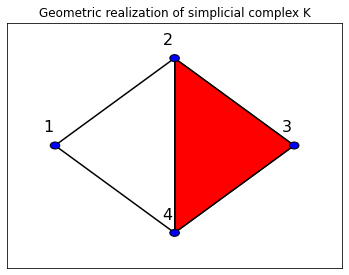

In [2]:
# create simplicial complex
K = simplicial.SimplicialComplex()

# add 0-simplices (vertices)
v1 = K.addSimplex(id="1")
v2 = K.addSimplex(id="2")
v3 = K.addSimplex(id="3")
v4 = K.addSimplex(id="4")

# add 1-simplices (edges)
K.addSimplex(['1', '2'], id="12")
K.addSimplex(['1', '4'], id="14")
K.addSimplex(['2', '3'], id="23")
K.addSimplex(['2', '4'], id="24")
K.addSimplex(['3', '4'], id="34")

# add 2-simplices (triangles)
K.addSimplex(['23', '24', '34'], id="234")

# positions
offset = (-0.05, 0.075)
pos = [(0.0, 0.5), (0.5, 1.0), (1.0, 0.5), (0.5, 0.0)]

# set positions for vertices
em = simplicial.Embedding(K)
em.positionSimplex(v1, pos[0])
em.positionSimplex(v2, pos[1])
em.positionSimplex(v3, pos[2])
em.positionSimplex(v4, pos[3])

# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Spaces of simplices

Given a simplicial complex $K = \{\emptyset, 1, 2, 3, 4, 12, 14, 23, 24, 34, 234\}$ its spaces of simplices are

$$
\begin{align}
\Delta_0 &= \{0, 1, 2, 3\}\\
\Delta_1 &= \{12, 14, 23, 24, 34 \}\\
\Delta_2 &= \{234 \}
\end{align}
$$

### Chain spaces

Chain space $C_k$ is defined as a formal sum of $k$-simplicies with coefficients in a field $\mathbb{k}$

$$c_k = \sum_i \alpha \sigma_i \in C_k,~\textrm{where}~\sigma_i \in \Delta_k, \alpha \in \mathbb{k}$$

#### Examples

Vertex chains $C_0$

$$
c_0 = [0] \sim [0 * 1 + 0 * 2 + 0 * 3 + 0 * 4]\\
c_0' = [1 + 2 + 4] ~ [1 * 1 + 1 * 2 + 0 * 3 + 1 * 4]
$$

Edge chains $C_1$

$$
c_1 = [12 + 23 + 34]\\
c_1' = [12 + 14 + 23 + 34]
$$

Triangle chains $C_2$

$$
c_2 = [234]\\
$$

#### Summation

One can take sums of chains, over $\mathbb{Z}_2$ the summation is defined modulo 2

$$
\begin{align}
c_1 + c_1' &= [12 + 23 + 34] + [12 + 14 + 24 + 34]\\
&= [14 + 23 + 24]
\end{align}
$$

In [3]:
# 12, 14, 23, 24, 34
c1 = np.array([1, 0, 1, 0, 1])
c1_prime = np.array([1, 1, 0, 1, 1])
(c1 + c1_prime) % 2

array([0, 1, 1, 1, 0])

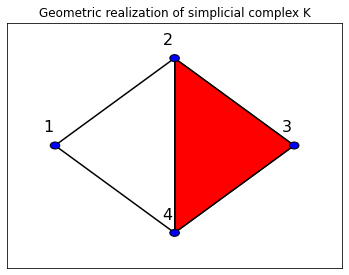

In [4]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Boundary operator

Given a $k$-simplex $\sigma = [v_0, v_1, \dots, v_k] \in \Delta_k$ its boundary $\partial_k \sigma \in C_{k-1}$ is defined

$$\partial_k \sigma = \sum_{i=0}^k~[v_0, v_1, \dots, v_{i-1}, v_{i+1}, \dots, v_k]$$

#### Examples

Edge

$$c_1 = 12\\
\partial c_1 = 2 + 1$$

Triangle

$$c_2 = 234\\
\partial c_2 = 34 + 24 + 23$$

#### Matrix representation

Boundary operator $\partial_k$ for a fixed basis can be represented by a matrix $\mathbf{B}_k$ having $k$-simplices $\sigma$ on columns and $k-1$-simplices $\tau$ on rows and $b_{ij} = 1$ if $\tau$ is in a boundary of $\sigma$.

In [5]:
# 12, 14, 23, 24, 34 -- columns
# 1, 2, 3, 4 -- rows
B1 = np.array([
    [1, 1, 0, 0, 0],
    [1, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1]
])
B1

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 1, 0, 1, 1]])

In [6]:
# 234 -- columns
# 12, 14, 23, 24, 34 -- rows
B2 = np.array([
    [0],
    [0],
    [1],
    [1],
    [1]
])
B2

array([[0],
       [0],
       [1],
       [1],
       [1]])

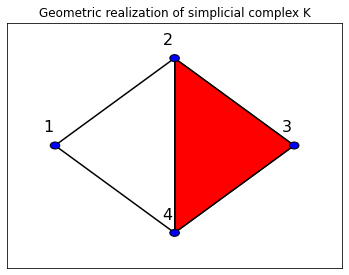

In [7]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Boundaries of chains

#### Boundary of a chain

Boundary operator is linear

$$
\begin{align}
c &= 12 + 24 + 34\\\\
\partial c &= \partial(12 + 24 + 34)\\
\partial c &= \partial(12) + \partial(24) + \partial(34)\\
\partial c &= (2 + 1) + (4 + 2) + (4 + 3)\\
\partial c &= 1 + 3
\end{align}
$$

In [8]:
c = np.array([1, 0, 0, 1, 1]) # 1*12 + 0*14 + 0*23 + 1*24 + 1*34
B1 @ c % 2

array([1, 0, 1, 0])

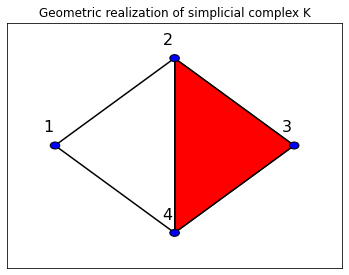

In [9]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

In [ ]:
D1 = np.array([
    [1, 1, 0, 0, 0],
    [-1, 0, 1, 1, 0],
    [0, 0, -1, 0, 1],
    [0, -1, 0, -1, -1]
])
# 12, 14, 23, 24, 34 -- columns
c_oriented = np.array([1, 0, 0, 1, -1])
z_oriented = np.array([1, -1, 1, 0, 1])
D1 @ c_oriented, D1 @ z_oriented

#### Boundary of a cycle

$$
\begin{align}
z &= 12 + 14 + 23 + 34\\\\
\partial z &= \partial(12) + \partial(14) + \partial(23) + \partial(34)\\
\partial z &= (2 + 1) + (4 + 1) + (2 + 3) + (4 + 3)\\
\partial z &= 0
\end{align}
$$

In [12]:
z = np.array([1, 1, 1, 0, 1])
B1 @ z % 2

array([0, 0, 0, 0])

#### Exercise

Find the boundary of the other cycle in the complex $K$.

In [13]:
z_prime = np.array([1, 1, 0, 1, 0]) # # 12, 14, 23, 24, 34
boundary = B1 @ z_prime % 2 # check if z_prime boundary is zero
boundary

array([0, 0, 0, 0])

### Chain complex

Chain complex is a sequence of chain spaces connected with boundary maps

$$C_2 \xrightarrow{\partial_2} C_1  \xrightarrow{\partial_1} C_0$$

For a given chain space $C_k$ the space of cycles $Z_k$ consists of all elements of $C_k$ which boundary $\partial_k$ is zero.

$$
\begin{align}
Z_k &= \mathrm{ker}~\partial_k\\
Z_k &= \{ c \in C_k \mid \partial_k = 0 \}\\\\
B_k &= \mathrm{im}~\partial_{k+1}\\
B_k &= \{ c \in C_k \mid \partial_{k+1}d = c,~\mathrm{for~some}~d \in C_{k+1} \}
\end{align}
$$

Hierarchy of spaces

$$B_k \subseteq Z_k \subseteq C_k$$

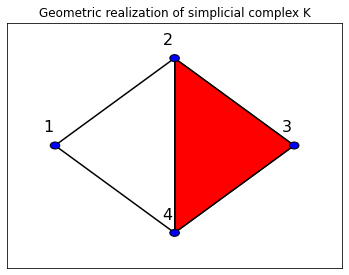

In [14]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Cycles and boundaries of $K$

$$Z_1 = \{ [12 + 14 + 24], [23 + 24 + 34], [12 + 14 + 23 + 34] \}$$
$$B_1 = \{[23 + 24 + 34]\}$$

### Homologous cycles

Two cycles $z_1$ and $z_2$ are said homologous $z_1 \sim z_2$ if their difference $z_1 - z_2 \in B_k$.

In [15]:
# 12, 14, 23, 24, 34
z1 = np.array([1, 1, 0, 1, 0])
z2 = np.array([1, 1, 1, 0, 1])

In [16]:
(z1 - z2) % 2 # 0*12 + 0*14 + 23 + 24 + 34

array([0, 0, 1, 1, 1])

### Optimal homologous cycles

#### Naive algorithm

Check for all cycles in $Z_k$ where their difference is an element (or combination) of $B_k$.

In [17]:
def optimal_representative(x0, B):
    T = B.shape[1]

    values = {}
    
    # compute all possible homologous cycles to x0
    # as the sum of a x0 w/ an element of the boundary group B_k
    for w in product([0, 1], repeat=T):
        values[tuple(w)] = (x0 + B @ np.asarray(w)) % 2
    
    # find the optimal one in the terms of number of edges, i.e. smallest 0-norm
    w_best, x_best = min(values.items(), key=lambda x: (x[1]).sum())
    
    return x_best, [(k,v) for k,v in values.items()] 

#### Find the shortest cycle homologous to $x_0$

In [20]:
# 12 + 14 + 23 + 34
x0 = np.array([1, 1, 1, 0, 1])
x0

array([1, 1, 1, 0, 1])

In [19]:
x_optimal, search_space = optimal_representative(x0, B2)
search_space

[((0,), array([1, 1, 1, 0, 1])), ((1,), array([1, 1, 0, 1, 0]))]

In [21]:
x_optimal

array([1, 1, 0, 1, 0])

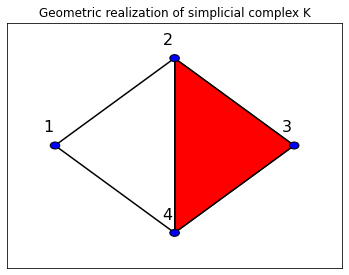

In [22]:
# draw simplicial complex
fig = plt.figure(figsize=(6,4.5))
plt.title("Geometric realization of simplicial complex K")
for i in range(4):
    plt.text(pos[i][0] + offset[0], pos[i][1] + offset[1], str(i+1), fontsize=16)
simplicial.drawing.draw_complex(K, em)

### Harmonic representatives

#### Hodge Laplacian

$k$-th Hodge Laplacian is defined

\begin{equation}
\mathbf{L}_k = \mathbf{B}_k^T \mathbf{B}_k + \mathbf{B}_{k+1} \mathbf{B}_{k+1}^T,
\end{equation}

then the $k$-the Betti number is the number of zero eigenvalues of $\mathbf{L}_k$.

In [23]:
# oriented, field Z (-1, 0, 1)
D0 = np.array([[0, 0, 0, 0]]) # 1, 2, 3, 4
D1 = np.array([
    [1, 1, 0, 0, 0],
    [-1, 0, 1, 1, 0],
    [0, 0, -1, 0, 1],
    [0, -1, 0, -1, -1]
])
D2 = np.array([[0, 0, -1, 1, -1]]).T # 234

In [24]:
L0 = D1 @ D1.T
L0

array([[ 2, -1,  0, -1],
       [-1,  3, -1, -1],
       [ 0, -1,  2, -1],
       [-1, -1, -1,  3]])

#### 0-th Betti number

In [25]:
np.isclose(np.linalg.eigvalsh(L0), 0).sum()

1

In [26]:
L1 = D1.T @ D1 + D2 @ D2.T
L1

array([[ 2,  1, -1, -1,  0],
       [ 1,  2,  0,  1,  1],
       [-1,  0,  3,  0,  0],
       [-1,  1,  0,  3,  0],
       [ 0,  1,  0,  0,  3]])

#### 1-th Betti number

In [27]:
np.isclose(np.linalg.eigvalsh(L1), 0).sum()

1

### Harmonic representatives

In [28]:
X = np.array([
    [1, 3], # 
    [3, 3],
    [0, 2],
    [2, 2],
    [4, 2],
    [0, 0],
    [4, 0]
])

In [29]:
cmplx = SimplicialComplex()

cmplx.add([0,1])
cmplx.add([0,2,3])
cmplx.add([1,3,4])
cmplx.add([2,5])
cmplx.add([4,6])
cmplx.add([5,6])

cmplx.simplices

[array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6]]),
 array([[0, 1],
        [0, 2],
        [0, 3],
        [1, 3],
        [1, 4],
        [2, 3],
        [2, 5],
        [3, 4],
        [4, 6],
        [5, 6]]),
 array([[0, 2, 3],
        [1, 3, 4]])]

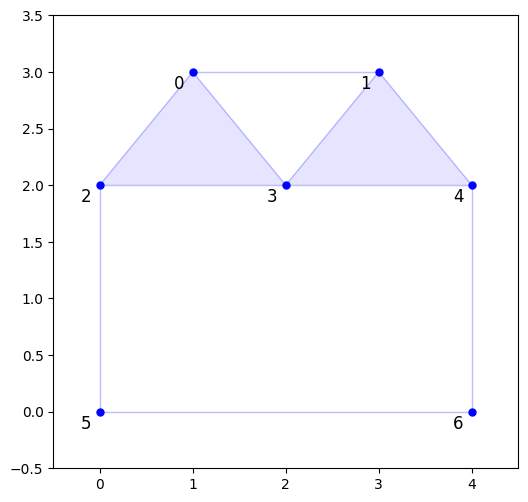

In [30]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(X[:,0], X[:,1], c="b", s=25)
plt.xlim(-0.5, 4.5)
plt.ylim(-0.5, 3.5)

# edges
for edge in cmplx.simplices[1]:
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=0.25, linewidth=1)

# triangles
for triangle in cmplx.simplices[2]:
    t = plt.Polygon(X[triangle], color="b", alpha=0.1, linewidth=0)
    plt.gca().add_patch(t)
    
for vertex in cmplx.simplices[0]:
        plt.annotate(vertex[0], (X[vertex,0]-0.2, X[vertex,1]-0.15), fontsize=12)

plt.show()

#### Boundary matrices

In [31]:
B1 = cmplx.boundary_operator_matrix(k=1) # edge-vertices
B2 = cmplx.boundary_operator_matrix(k=2) # triangle-edges

In [32]:
B1

array([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]])

In [33]:
B2

array([[ 0.,  0.],
       [ 1.,  0.],
       [-1.,  0.],
       [ 0.,  1.],
       [ 0., -1.],
       [ 1.,  0.],
       [ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  0.],
       [ 0.,  0.]])

#### 0-th Hodge Laplacian

In [34]:
L0 = B1 @ B1.T
L0

array([[ 3., -1., -1., -1.,  0.,  0.,  0.],
       [-1.,  3.,  0., -1., -1.,  0.,  0.],
       [-1.,  0.,  3., -1.,  0., -1.,  0.],
       [-1., -1., -1.,  4., -1.,  0.,  0.],
       [ 0., -1.,  0., -1.,  3.,  0., -1.],
       [ 0.,  0., -1.,  0.,  0.,  2., -1.],
       [ 0.,  0.,  0.,  0., -1., -1.,  2.]])

In [35]:
np.isclose(np.linalg.eigvalsh(L0), 0).sum()

1

#### 1-th Hodge Laplacian

In [36]:
L1 = B1.T @ B1 + B2 @ B2.T
L1

array([[ 2.,  1.,  1., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  3.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  3.,  1.,  0.,  0.,  0., -1.,  0.,  0.],
       [-1.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  3.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  3.,  1., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  1.,  2.,  0.,  0., -1.],
       [ 0.,  0., -1.,  0.,  0., -1.,  0.,  3., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  2.]])

In [37]:
np.isclose(np.linalg.eigvalsh(L1), 0).sum()

2

#### Harmonic representatives

In [38]:
eigenvalues, eigenvectors = np.linalg.eigh(L1)
eigenvalues, eigenvectors

(array([-0.  , -0.  ,  1.09,  1.75,  3.  ,  3.  ,  3.45,  3.71,  4.8 ,  5.2 ]),
 array([[-0.01,  0.67, -0.  ,  0.35,  0.  ,  0.  ,  0.45,  0.  ,  0.48, -0.  ],
        [ 0.17, -0.25,  0.31, -0.22,  0.56, -0.15,  0.1 ,  0.48,  0.43, -0.09],
        [-0.15, -0.42,  0.08,  0.18, -0.56,  0.15,  0.23,  0.37,  0.24,  0.43],
        [ 0.15,  0.42,  0.08, -0.18, -0.15, -0.56, -0.23,  0.37, -0.24,  0.43],
        [-0.17,  0.25,  0.31,  0.22,  0.15,  0.56, -0.1 ,  0.48, -0.43, -0.09],
        [-0.32, -0.16, -0.23,  0.39,  0.56, -0.15,  0.12, -0.11, -0.19,  0.52],
        [ 0.48, -0.09,  0.59,  0.08,  0.  ,  0.  ,  0.41, -0.34, -0.3 ,  0.19],
        [-0.32, -0.16,  0.23,  0.39, -0.15, -0.56,  0.12,  0.11, -0.19, -0.52],
        [-0.48,  0.09,  0.59, -0.08, -0.  , -0.  , -0.41, -0.34,  0.3 ,  0.19],
        [ 0.48, -0.09, -0.  ,  0.63, -0.  , -0.  , -0.56, -0.  ,  0.21, -0.  ]]))

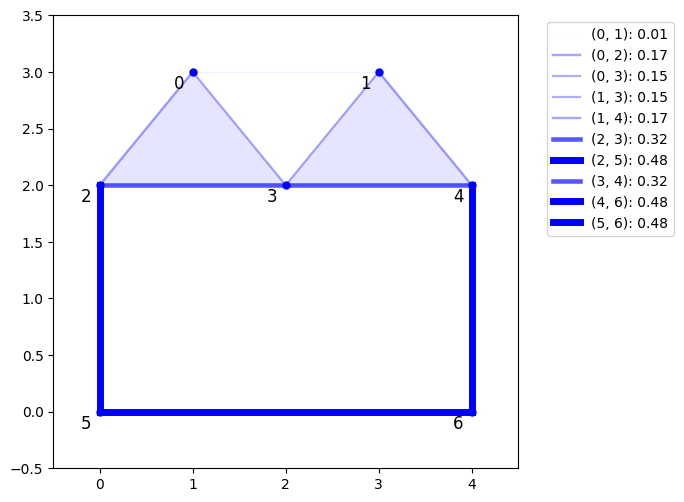

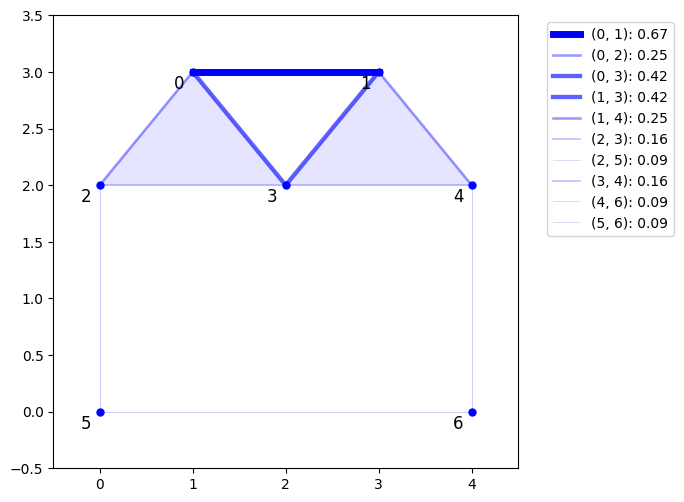

In [39]:
# for each zero eigenvalue
for k in range(len(eigenvalues)):
    
    if np.isclose(eigenvalues[k], 0):

        plt.figure(figsize=(6,6), dpi=100)
        plt.scatter(X[:,0], X[:,1], c="b", s=25)
        plt.xlim(-0.5, 4.5)
        plt.ylim(-0.5, 3.5)

        # edges
        for edge in cmplx.simplices[1]:
            plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=0.05, linewidth=1)

        # triangles
        for triangle in cmplx.simplices[2]:
            t = plt.Polygon(X[triangle], color="b", alpha=0.1, linewidth=0)
            plt.gca().add_patch(t)

        # harmonic representatives
        eigenvector_normalized = np.abs(eigenvectors[:,k]) / np.abs(eigenvectors[:,k]).max()
        for i, edge in enumerate(cmplx.simplices[1]):
            plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=eigenvector_normalized[i], linewidth=5*eigenvector_normalized[i], label="({}, {}): {:.2f}".format(edge[0], edge[1], np.abs(eigenvectors[i,k])))

        for vertex in cmplx.simplices[0]:
            plt.annotate(vertex[0], (X[vertex,0]-0.2, X[vertex,1]-0.15), fontsize=12)

        plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1.0))
        plt.show()


#### Harmonic representatives are cycles

In [42]:
B1 @ eigenvectors[:,2]

array([-0.39, -0.39, -0.05, -0.3 , -0.05,  0.59,  0.59])

In [142]:
B1

array([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]])

### Hodge decomposition

Consider a simplicial complex $K$. Given a 1-cochain $\mathbf{x} \in C^1(K)$ the gradient component $\mathbf{x}^G$

\begin{equation}
    \mathbf{x}^G = \mathbf{B}_1^T (\mathbf{B}_1\mathbf{B}_1^T)^+ \mathbf{B}_1 \mathbf{x},
\end{equation}

where $\mathbf{A}^+$ is the Moore-Penrose pseudoinverse.

The solenoidal component $\mathbf{x}^S$

\begin{equation}
    \mathbf{x}^S = \mathbf{B}_2 (\mathbf{B}_2^T\mathbf{B}_2)^+ \mathbf{B}_2 \mathbf{x}.
\end{equation}

The harmonic component $\mathbf{x}^H$

\begin{equation}
    \mathbf{x}^H = \mathbf{x} - \mathbf{x}^G - \mathbf{x}^S.
\end{equation}

In [48]:
P_G = B1.T @ np.linalg.pinv(B1 @ B1.T) @ B1
P_G

array([[ 0.55,  0.17,  0.28, -0.28, -0.17,  0.1 ,  0.07,  0.1 , -0.07,  0.07],
       [ 0.17,  0.57,  0.25,  0.08,  0.09, -0.32, -0.1 ,  0.01,  0.1 , -0.1 ],
       [ 0.28,  0.25,  0.47,  0.2 ,  0.08,  0.22,  0.03, -0.11, -0.03,  0.03],
       [-0.28,  0.08,  0.2 ,  0.47,  0.25,  0.11, -0.03, -0.22,  0.03, -0.03],
       [-0.17,  0.09,  0.08,  0.25,  0.57, -0.01,  0.1 ,  0.32, -0.1 ,  0.1 ],
       [ 0.1 , -0.32,  0.22,  0.11, -0.01,  0.54,  0.14, -0.13, -0.14,  0.14],
       [ 0.07, -0.1 ,  0.03, -0.03,  0.1 ,  0.14,  0.76,  0.14,  0.24, -0.24],
       [ 0.1 ,  0.01, -0.11, -0.22,  0.32, -0.13,  0.14,  0.54, -0.14,  0.14],
       [-0.07,  0.1 , -0.03,  0.03, -0.1 , -0.14,  0.24, -0.14,  0.76,  0.24],
       [ 0.07, -0.1 ,  0.03, -0.03,  0.1 ,  0.14, -0.24,  0.14,  0.24,  0.76]])

In [49]:
P_S = B2 @ np.linalg.pinv(B2.T @ B2) @ B2.T
P_S

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.33, -0.33,  0.  ,  0.  ,  0.33,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.33,  0.33,  0.  ,  0.  , -0.33,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.33, -0.33,  0.  ,  0.  ,  0.33,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.33,  0.33,  0.  ,  0.  , -0.33,  0.  ,  0.  ],
       [ 0.  ,  0.33, -0.33,  0.  ,  0.  ,  0.33,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.33, -0.33,  0.  ,  0.  ,  0.33,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [134]:
x = np.ones(cmplx.f_vector[1])
x = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])
x = np.array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0])
x = np.array([0, 0, 0, 0, 0, 1, 1, 1, -1, 1])
x

array([ 0,  0,  0,  0,  0,  1,  1,  1, -1,  1])

In [135]:
x_G = P_G @ x
x_G

array([ 0.41, -0.62,  0.21, -0.21,  0.62,  0.83,  0.55,  0.83, -0.55,  0.55])

In [136]:
x_S = P_S @ x
x_S

array([ 0.  ,  0.33, -0.33,  0.33, -0.33,  0.33,  0.  ,  0.33,  0.  ,  0.  ])

In [137]:
x_H = x - P_G @ x - P_S @ x
x_H

array([-0.41,  0.29,  0.13, -0.13, -0.29, -0.16,  0.45, -0.16, -0.45,  0.45])

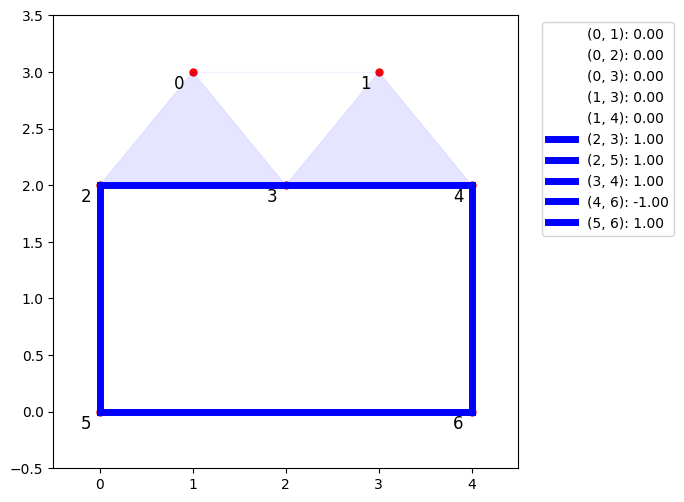

In [138]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(X[:,0], X[:,1], c="r", s=25)
plt.xlim(-0.5, 4.5)
plt.ylim(-0.5, 3.5)

# edges
for edge in cmplx.simplices[1]:
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=0.05, linewidth=1)

# triangles
for triangle in cmplx.simplices[2]:
    t = plt.Polygon(X[triangle], color="b", alpha=0.1, linewidth=0)
    plt.gca().add_patch(t)

# harmonic representatives
eigenvector_normalized = x / np.abs(x).max()
for i, edge in enumerate(cmplx.simplices[1]):
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=np.abs(eigenvector_normalized[i]), linewidth=5*np.abs(eigenvector_normalized[i]), label="({}, {}): {:.2f}".format(edge[0], edge[1], eigenvector_normalized[i]))

for vertex in cmplx.simplices[0]:
    plt.annotate(vertex[0], (X[vertex,0]-0.2, X[vertex,1]-0.15), fontsize=12)

plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1.0))
plt.show()

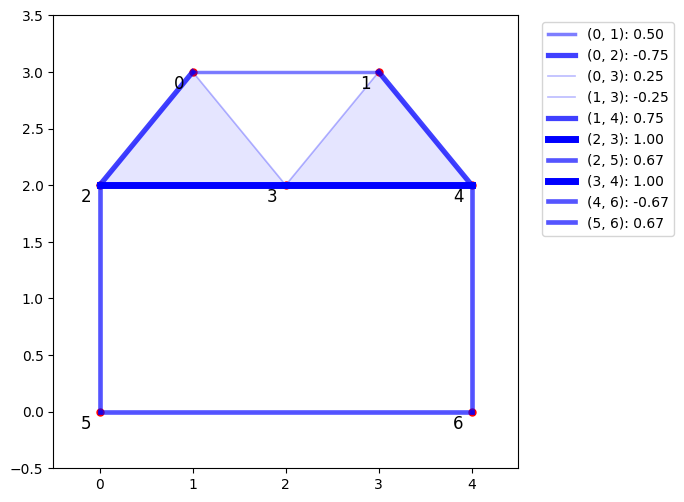

In [139]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(X[:,0], X[:,1], c="r", s=25)
plt.xlim(-0.5, 4.5)
plt.ylim(-0.5, 3.5)

# edges
for edge in cmplx.simplices[1]:
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=0.05, linewidth=1)

# triangles
for triangle in cmplx.simplices[2]:
    t = plt.Polygon(X[triangle], color="b", alpha=0.1, linewidth=0)
    plt.gca().add_patch(t)

# harmonic representatives
eigenvector_normalized = x_G / np.abs(x_G).max()
for i, edge in enumerate(cmplx.simplices[1]):
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=np.abs(eigenvector_normalized[i]), linewidth=5*np.abs(eigenvector_normalized[i]), label="({}, {}): {:.2f}".format(edge[0], edge[1], eigenvector_normalized[i]))

for vertex in cmplx.simplices[0]:
    plt.annotate(vertex[0], (X[vertex,0]-0.2, X[vertex,1]-0.15), fontsize=12)

plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1.0))
plt.show()

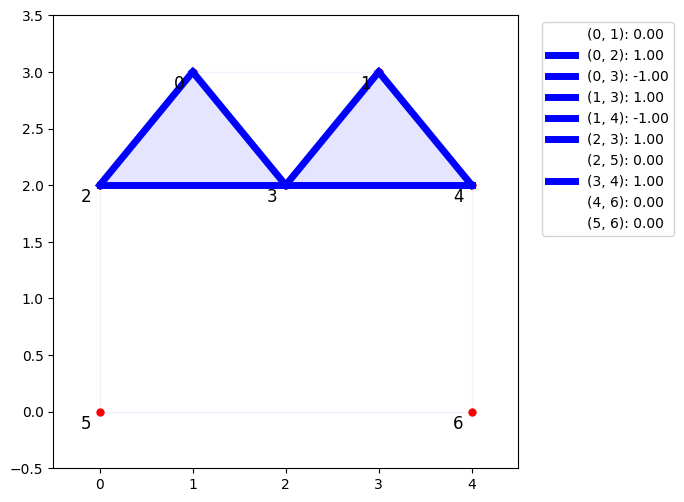

In [140]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(X[:,0], X[:,1], c="r", s=25)
plt.xlim(-0.5, 4.5)
plt.ylim(-0.5, 3.5)

# edges
for edge in cmplx.simplices[1]:
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=0.05, linewidth=1)

# triangles
for triangle in cmplx.simplices[2]:
    t = plt.Polygon(X[triangle], color="b", alpha=0.1, linewidth=0)
    plt.gca().add_patch(t)

# harmonic representatives
eigenvector_normalized = x_S / np.abs(x_S).max()
for i, edge in enumerate(cmplx.simplices[1]):
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=np.abs(eigenvector_normalized[i]), linewidth=5*np.abs(eigenvector_normalized[i]), label="({}, {}): {:.2f}".format(edge[0], edge[1], eigenvector_normalized[i]))

for vertex in cmplx.simplices[0]:
    plt.annotate(vertex[0], (X[vertex,0]-0.2, X[vertex,1]-0.15), fontsize=12)

plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1.0))
plt.show()

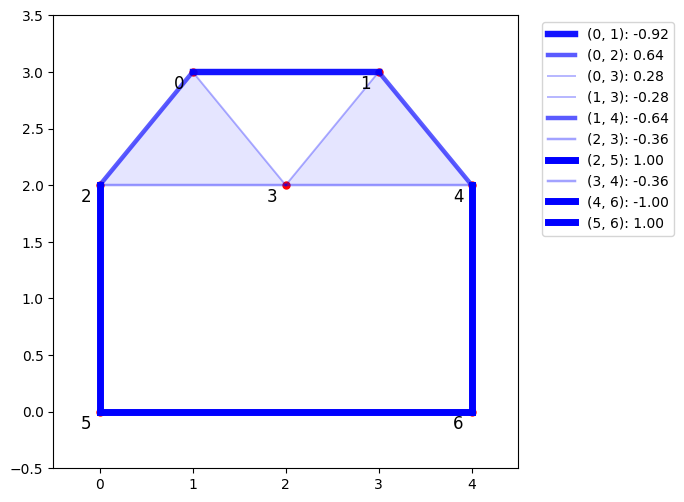

In [141]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(X[:,0], X[:,1], c="r", s=25)
plt.xlim(-0.5, 4.5)
plt.ylim(-0.5, 3.5)

# edges
for edge in cmplx.simplices[1]:
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=0.05, linewidth=1)

# triangles
for triangle in cmplx.simplices[2]:
    t = plt.Polygon(X[triangle], color="b", alpha=0.1, linewidth=0)
    plt.gca().add_patch(t)

# harmonic representatives
eigenvector_normalized = x_H / np.abs(x_H).max()
for i, edge in enumerate(cmplx.simplices[1]):
    plt.plot(X[edge][:,0], X[edge][:,1], c="b", alpha=np.abs(eigenvector_normalized[i]), linewidth=5*np.abs(eigenvector_normalized[i]), label="({}, {}): {:.2f}".format(edge[0], edge[1], eigenvector_normalized[i]))

for vertex in cmplx.simplices[0]:
    plt.annotate(vertex[0], (X[vertex,0]-0.2, X[vertex,1]-0.15), fontsize=12)

plt.legend(loc="upper right", bbox_to_anchor=(1.35, 1.0))
plt.show()